In [72]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# Linear Regression 

### The normal equation

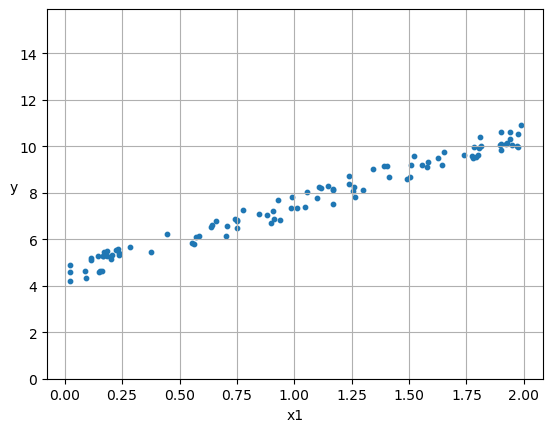

In [45]:
# Generating a linear-looking dataset to test the normal equation on

m = 100

# column vector
X = 2 * np.random.rand(m, 1)

# the random addition at the end is for adding noise
y = 4 + 3 * X + np.random.rand(m, 1)

plt.scatter(X, y, s=10)
plt.ylim(0, max(y) + 5)

plt.grid()
plt.xlabel("x1")
plt.ylabel("y", rotation=0)

plt.show()


In [46]:
# Adds another column of all ones 
X_b = add_dummy_feature(X)

# the normal equation
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print (theta_best)

# Our actual equation for y is: y = 4 + 3 * X + np.random.rand(m, 1). The parameters we got back form the normal equation 
# are 4.59 and 2.89 which are close estimations for 4 and 3. The reason for not getting exactly 3 and 4 is due to the noise
# that we added to the dataset

[[4.58947013]
 [2.93782492]]


[[ 4.59]
 [10.47]]
[ 4. 10.]


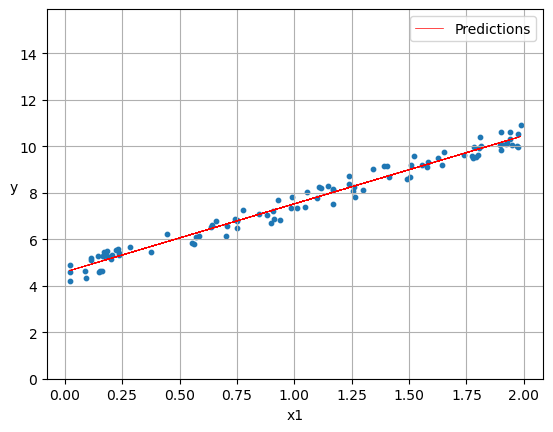

In [71]:
# Now we can use theta we got to make predictions

X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_actual = 4 + 3 * X_new_b[:,1]
print (y_predict.round(2))
print (y_actual)

# Plot the model's predictions
y_hat = X_b @ theta_best

plt.scatter(X, y, s=10)
plt.plot(X, y_hat, color='red', label="Predictions", linewidth=0.5)
plt.ylim(0, max(y) + 5)

plt.grid()
plt.legend()
plt.xlabel("x1")
plt.ylabel("y", rotation=0)

plt.show()



In [79]:
# Using the sklearn LinearRegression model to do the same thing. It's based on Numpy's least square function
# (np.linalg.lstsq)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# b and p1 of the parameter vector (sklearn separates them)
print (lin_reg.intercept_, lin_reg.coef_)

y_hat = lin_reg.predict(X)

[4.58947013] [[2.93782492]]


# Linear Regression 

### Gradient descent